단순 선형 회귀

In [2]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch09/figures/09_01.png', width=500)

다중선형 회귀

In [3]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch09/figures/09_01_2.png', width=500)

데이터 탐색

데이터셋 소스: http://jse.amstat.org/v19n3/decock/AmesHousing.txt

데이터셋 문서: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

데이터셋 설명: http://jse.amstat.org/v19n3/decock.pdf

In [4]:
import pandas as pd
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t',usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [5]:
df.shape

(2930, 6)

In [10]:
df['Central Air'] = df['Central Air'].map({
    'Y':1,'N':0
})

In [11]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [13]:
# 누락된 값을 포함하고  있는 행을 삭제
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

데이터셋의 중요 특징 시각

In [14]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

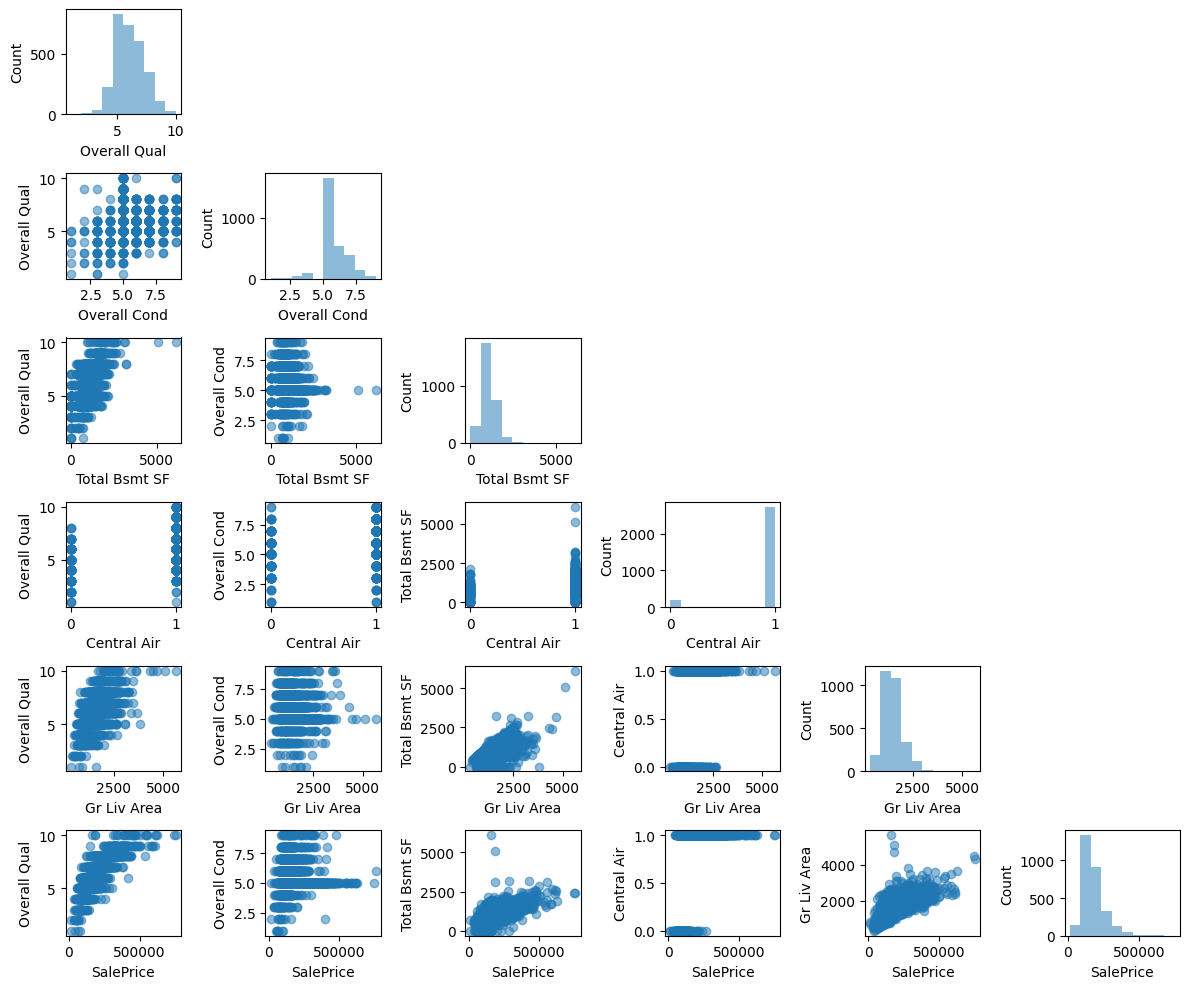

In [15]:
scatterplotmatrix(df.values,figsize=(12,10),names=df.columns,alpha=0.5)
plt.tight_layout()
plt.show()

상관관계 행렬을 사용한 분석

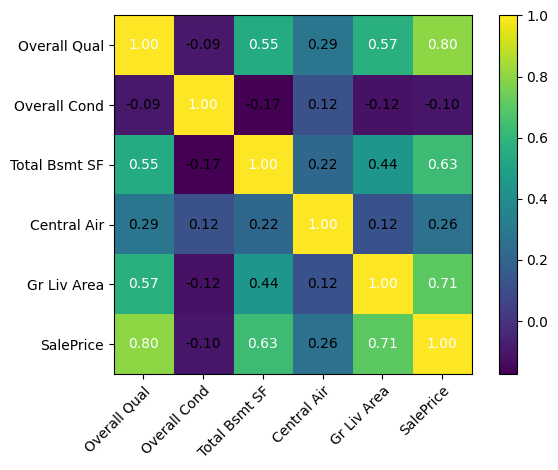

In [19]:
import numpy as np
from mlxtend.plotting import heatmap

# df.values.shape, df.values.T.shape
cm = np.corrcoef(df.values.T)
hm = heatmap(cm,row_names=df.columns,column_names=df.columns)

plt.tight_layout()
plt.show()

최소 제곱 선형 회귀모델 구현
  - 경사 하강법으로 회귀 모델의 파라메터 구하기

In [20]:
class LinearRegressionGD:
  def __init__(self,eta=0.01, n_iter=50,random_state=1) -> None:
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0,scale=0.01,size=X.shape[1])
    self.b_ = np.array([0.])
    self.losses_ = []
    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y - output)
      self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]  # 가중치 업데이트 경사하강법
      self.b_ += self.eta * 2.0 * errors.mean() # 절편업데이트 경사하강법
      loss = (errors**2).mean()
      self.losses_.append(loss)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_) + self.b_
  def predict(self, X):
    return self.net_input(X)

In [21]:
X = df[['Gr Liv Area']].values  # 집 크기
y = df['SalePrice'].values  # 가격

In [23]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:,np.newaxis]).flatten()

In [30]:
# np.newaxis 넘파이에서 차원을 추가하는데 사용되는 특별한 인덱싱 기법
# 배열을 새로운 차원으로 확장
ar = np.array([1,2,3,4,5])
print(ar.shape)
ar_2 = ar[:,np.newaxis]
print(ar_2.shape)
ar_2_1 = np.expand_dims(ar,axis=-1)
print(ar_2_1.shape)
ar, ar_2,ar_2_1

(5,)
(5, 1)
(5, 1)


(array([1, 2, 3, 4, 5]),
 array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([[1],
        [2],
        [3],
        [4],
        [5]]))

In [31]:
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std,y_std)

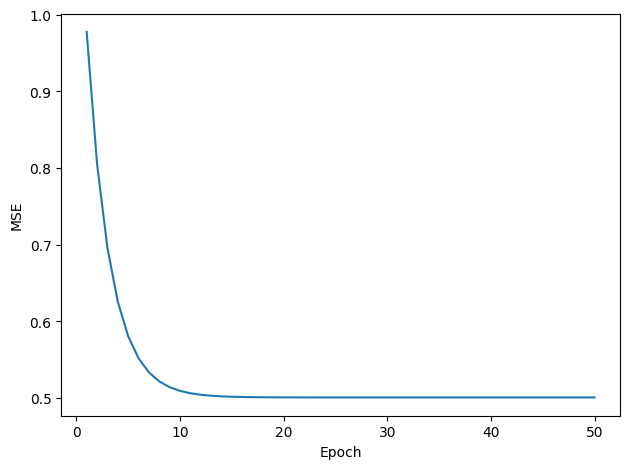

In [32]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

In [33]:
def lin_regplot(X,y,model):
  plt.scatter(X,y,c='steelblue', edgecolors='white',s=70)
  plt.plot(X,model.predict(X), color='black', lw=2)
  return

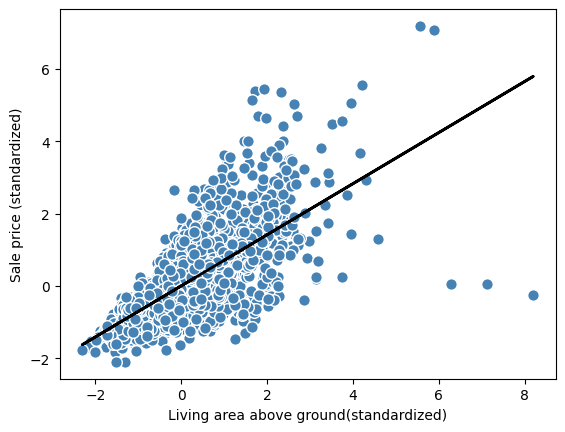

In [34]:
lin_regplot(X_std,y_std, lr)
plt.xlabel("Living area above ground(standardized)")
plt.ylabel('Sale price (standardized)')
plt.show()

In [36]:
# 가격 예측
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1,1))  # 역변환으로 원래 스케일로 변경
target_reverted.flatten()[0]

292507.0674366433

사이킷런으로 회귀모델의 가중치 추정

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
slr = LinearRegression()
slr.fit(X,y)
y_pred = slr.predict(X)
print(f"기울기 : {slr.coef_[0] : .3f}")
print(f"절편 : {slr.intercept_ : .3f}")

기울기 :  111.666
절편 :  13342.979


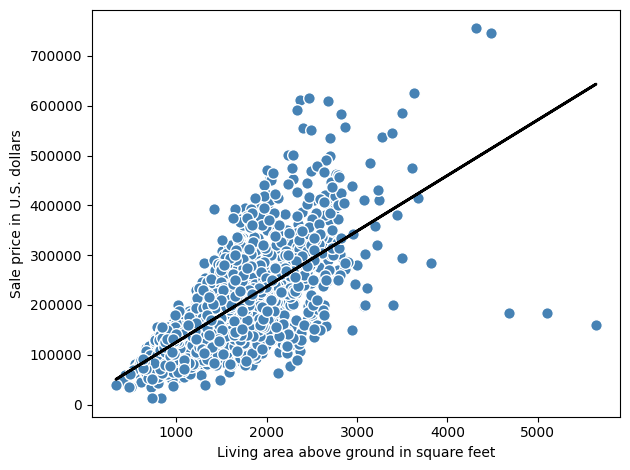

In [39]:
lin_regplot(X,y,slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.tight_layout()
plt.show()

RANSAC(Random Sample Consensus) : 이상치에  강한 모델 피팅방법 중 하나
  - 주어진 데이터에서 이상치에 영향을 받지 않고 모델을 적합시키기위해 사용

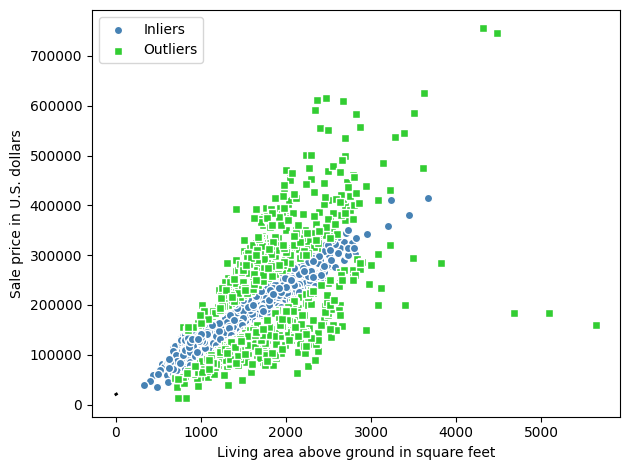

In [41]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=0.95,
                         loss='absolute_error',
                         residual_threshold=None,
                         random_state=123
                         )
ransac.fit(X,y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],c='steelblue',edgecolor='white',marker='o',label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],c='limegreen',edgecolor='white', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [42]:
print(f"기울기:{ransac.estimator_.coef_[0]: .3f}")
print(f"절편:{ransac.estimator_.intercept_: .3f}")

기울기: 106.348
절편: 20190.093


In [43]:
def median_absolute_deviation(data):
  return np.median(np.abs(data-np.median(data)))

median_absolute_deviation(y)

37000.0

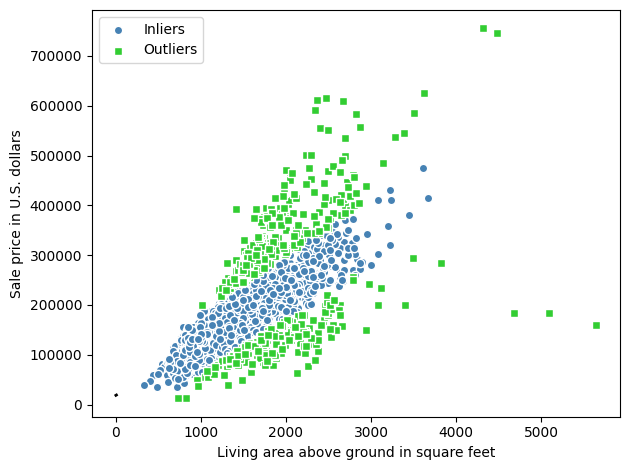

In [44]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=0.95,
                         loss='absolute_error', # default
                         residual_threshold=65000,# default
                         random_state=123
                         )
ransac.fit(X,y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],c='steelblue',edgecolor='white',marker='o',label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],c='limegreen',edgecolor='white', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

선형 회귀 모델의 성능 평가

In [45]:
from sklearn.model_selection import train_test_split

target = 'SalePrice'
features = df.columns[df.columns!=target]
print(features)

Index(['Overall Qual', 'Overall Cond', 'Total Bsmt SF', 'Central Air',
       'Gr Liv Area'],
      dtype='object')


In [46]:
X = df[features].values
y = df[target].values
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=123)

In [47]:
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

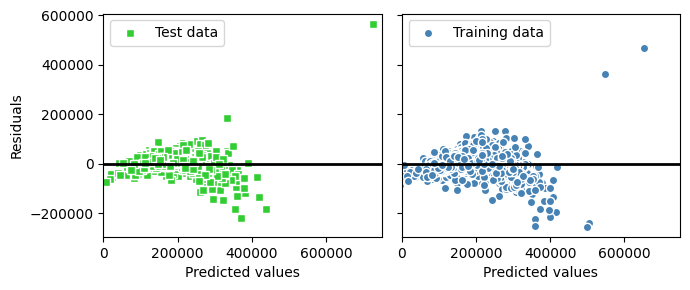

In [70]:
# 예측된 값의 최대 및 최소
x_max = np.max([ np.max(y_train_pred), np.max(y_test_pred) ])
x_min = np.min([ np.min(y_train_pred), np.min(y_test_pred)] )
# 두개의 서브 플랏을 생성
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(7,3), sharey=True)
ax1.scatter(np.ceil(y_test_pred), y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white',label='Test data')
ax2.scatter(np.ceil(y_train_pred), y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white',label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
  ax.set_xlabel('Predicted values')
  ax.legend(loc='upper left')
  ax.hlines(y=0, xmin=x_min-100, xmax=x_max*100, color='black', lw=2)
  ax.set_xlim([0,750000 ])
plt.tight_layout()
plt.show()

In [54]:
np.ceil(y_train_pred)

array([142136., 192530., 133782., ..., 499781., 216808., 216107.])